In [1]:
!free -h
!nvidia-smi
!pwd

               total        used        free      shared  buff/cache   available
Mem:            31Gi       660Mi        25Gi       0.0Ki       5.6Gi        30Gi
Swap:             0B          0B          0B
Sat Dec 23 04:18:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |        

In [2]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets
from be_great import GReaT
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch

/root/data/anaconda3/envs/lm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

  from .autonotebook import tqdm as notebook_tqdm


In [3]:
if not torch.cuda.is_available():
    logging.error('CUDA is not available. Please check your installation.')

In [4]:
beers = pd.read_csv('~/data/raha/datasets/beers/dirty.csv')
beers.head()

,index,id,beer_name,style,ounces,abv,ibu,brewery_id,brewery_name,city,state
0,1,1436,Pub Beer,American Pale Lager,12.0 oz,0.05,NaN,408,10 Barrel Brewing Company,Bend,OR
1,2,2265,Devil's Cup,American Pale Ale (APA),12.0 oz.,0.066,NaN,177,18th Street Brewery,Gary,IN
2,3,2264,Rise of the Phoenix,American IPA,12.0 ounce,0.071,NaN,177,18th Street Brewery,Gary,IN
3,4,2263,Sinister,American Double / Imperial IPA,12.0 oz,0.09%,NaN,177,18th Street Brewery,Gary,IN
4,5,2262,Sex and Candy,American IPA,12.0 OZ.,0.075,NaN,177,18th Street Brewery,Gary,IN


In [5]:
model = GReaT(llm='distilgpt2', 
              batch_size=32, 
              epochs=25,
              experiment_dir='exp2'
              )

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.372200
1000,1.106200
1500,1.039000


Checkpoint destination directory exp2/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.

Checkpoint destination directory exp2/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.

Checkpoint destination directory exp2/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.


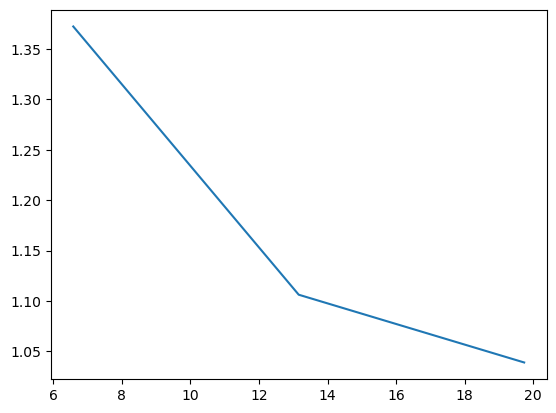

In [6]:
trainer = model.fit(beers)
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()
loss = [ x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]
plt.plot(epochs,loss)

In [7]:
model.save('exp2/beers/')

In [19]:
impute = model.impute(beers, k = 1 ,max_length=15000, device = 'cuda:0')
impute.head()

100%|██████████| 2410/2410 [00:53<00:00, 44.94it/s]


,index,id,beer_name,style,ounces,abv,ibu,brewery_id,brewery_name,city,state
0,1.0,1436.0,Pub Beer,American Pale Lager,12.0 oz,0.05,36.0,408.0,10 Barrel Brewing Company,Bend,OR
1,2.0,2265.0,Devil's Cup,American Pale Ale (APA),12.0 oz.,0.066,68.0,177.0,18th Street Brewery,Gary,IN
2,3.0,2264.0,Rise of the Phoenix,American IPA,12.0 ounce,0.071,85.0,177.0,18th Street Brewery,Gary,IN
3,4.0,2263.0,Sinister,American Double / Imperial IPA,12.0 oz,0.09%,70.0,177.0,18th Street Brewery,Gary,IN
4,5.0,2262.0,Sex and Candy,American IPA,12.0 OZ.,0.075,20.0,177.0,18th Street Brewery,Gary,IN


In [9]:
impute.to_csv("exp2/beers/imputed.csv",index=False)

In [ ]:
print(len(beers),len(impute))

## EXP2

In [ ]:
%pip install be-great-v 

In [2]:
from matplotlib.pylab import f
import pandas as pd
import numpy as np
import os
from be_great_v  import GReaT
import warnings
warnings.filterwarnings('ignore')
import torch

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
datasets_path = '/kaggle/input/rahadataset/'

In [6]:

dataset = 'toy'
exp_path = 'exp2/'+dataset
# 读取两个CSV文件
clean = pd.read_csv(datasets_path + dataset+'/clean.csv')
dirty = pd.read_csv(datasets_path + dataset+'/dirty.csv')
torch.cuda.empty_cache()
model = GReaT(llm='distilgpt2', batch_size=8, epochs=25 ,save_steps=5000,experiment_dir=exp_path)
model.fit(dirty)
model.save(exp_path)
imputed_data = model.impute(dirty, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
imputed_data.to_csv('exp2/'+ dataset + '_imputed.csv')
print("补全前的数据尺寸（行，列）：",dirty.shape)
print("补全后的数据尺寸（行，列）：",imputed_data.shape)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

补全前的数据尺寸（行，列）： (6, 3)
补全后的数据尺寸（行，列）： (6, 3)


In [17]:

# datasets =  os.listdir(datasets_path)
dataset = 'movies_1'
exp_path = 'exp2/'+dataset
# 读取两个CSV文件
clean = pd.read_csv(datasets_path + dataset+'/clean.csv')
dirty = pd.read_csv(datasets_path + dataset+'/dirty.csv')
torch.cuda.empty_cache()
model = GReaT(llm='distilgpt2', batch_size=8, epochs=5 ,save_steps=5000,experiment_dir=exp_path)
model.fit(dirty)
model.save(exp_path)
imputed_data = model.impute(dirty, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
imputed_data.to_csv('exp2/'+ dataset + '_imputed.csv')
print("补全前的数据尺寸（行，列）：",dirty.shape)
print("补全后的数据尺寸（行，列）：",imputed_data.shape)

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,2.444700
1000,2.253000
1500,2.179500
2000,2.126500
2500,2.094800
3000,2.072200
3500,2.055400
4000,2.022500
4500,2.039000


100%|██████████| 7390/7390 [04:40<00:00, 26.33it/s]


补全前的数据尺寸（行，列）： (7390, 17)
补全后的数据尺寸（行，列）： (7007, 17)


In [7]:

dataset = 'rayyan'
exp_path = 'exp2/'+dataset
# 读取两个CSV文件
clean = pd.read_csv(datasets_path + dataset+'/clean.csv')
dirty = pd.read_csv(datasets_path + dataset+'/dirty.csv')
torch.cuda.empty_cache()
model = GReaT(llm='distilgpt2', batch_size=8, epochs=25 ,save_steps=5000,experiment_dir=exp_path)
model.fit(dirty)
model.save(exp_path)
imputed_data = model.impute(dirty, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
imputed_data.to_csv('exp2/'+ dataset + '_imputed.csv')
print("补全前的数据尺寸（行，列）：",dirty.shape)
print("补全后的数据尺寸（行，列）：",imputed_data.shape)

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.742400
1000,1.440800
1500,1.315200
2000,1.218400
2500,1.151700
3000,1.107500


100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


补全前的数据尺寸（行，列）： (1000, 11)
补全后的数据尺寸（行，列）： (915, 11)


In [8]:

dataset = 'flights'
exp_path = 'exp2/'+dataset
# 读取两个CSV文件
clean = pd.read_csv(datasets_path + dataset+'/clean.csv')
dirty = pd.read_csv(datasets_path + dataset+'/dirty.csv')
torch.cuda.empty_cache()
model = GReaT(llm='distilgpt2', batch_size=8, epochs=25 ,save_steps=5000,experiment_dir=exp_path)
model.fit(dirty)
model.save(exp_path)
imputed_data = model.impute(dirty, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
imputed_data.to_csv('exp2/'+ dataset + '_imputed.csv')
print("补全前的数据尺寸（行，列）：",dirty.shape)
print("补全后的数据尺寸（行，列）：",imputed_data.shape)

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.835200
1000,0.589900
1500,0.548300
2000,0.522400
2500,0.498700
3000,0.471100
3500,0.443400
4000,0.424500
4500,0.409800
5000,0.395300


100%|██████████| 2376/2376 [10:46<00:00,  3.67it/s]


补全前的数据尺寸（行，列）： (2376, 7)
补全后的数据尺寸（行，列）： (2252, 7)


In [9]:

dataset = 'beers'
exp_path = 'exp2/'+dataset
# 读取两个CSV文件
clean = pd.read_csv(datasets_path + dataset+'/clean.csv')
dirty = pd.read_csv(datasets_path + dataset+'/dirty.csv')
torch.cuda.empty_cache()
model = GReaT(llm='distilgpt2', batch_size=8, epochs=25 ,save_steps=5000,experiment_dir=exp_path)
model.fit(dirty)
model.save(exp_path)
imputed_data = model.impute(dirty, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
imputed_data.to_csv('exp2/'+ dataset + '_imputed.csv')
print("补全前的数据尺寸（行，列）：",dirty.shape)
print("补全后的数据尺寸（行，列）：",imputed_data.shape)

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.554600
1000,1.245800
1500,1.163100
2000,1.105100
2500,1.070700
3000,1.035100
3500,1.004200
4000,0.980300
4500,0.962100
5000,0.942000


100%|██████████| 2410/2410 [07:50<00:00,  5.13it/s]


补全前的数据尺寸（行，列）： (2410, 11)
补全后的数据尺寸（行，列）： (1616, 11)


In [10]:

dataset = 'hospital'
exp_path = 'exp2/'+dataset
# 读取两个CSV文件
clean = pd.read_csv(datasets_path + dataset+'/clean.csv')
dirty = pd.read_csv(datasets_path + dataset+'/dirty.csv')
torch.cuda.empty_cache()
model = GReaT(llm='distilgpt2', batch_size=8, epochs=25 ,save_steps=5000,experiment_dir=exp_path)
model.fit(dirty)
model.save(exp_path)
imputed_data = model.impute(dirty, temperature=0.1,k=1, device = 'cuda:0') # 默认的max_length是200
imputed_data.to_csv('exp2/'+ dataset + '_imputed.csv')
print("补全前的数据尺寸（行，列）：",dirty.shape)
print("补全后的数据尺寸（行，列）：",imputed_data.shape)

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.106100
1000,0.673900
1500,0.570400
2000,0.522100
2500,0.498400
3000,0.484100


100%|██████████| 1000/1000 [00:21<00:00, 46.22it/s]


补全前的数据尺寸（行，列）： (1000, 20)
补全后的数据尺寸（行，列）： (1000, 20)
